In [1]:
# Importing Libraries
from data_loader import load_data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  

df = load_data()
df_temp = df.copy()
df_temp['payment_method'].fillna('Unknown', inplace=True)

Successful connection to the database.
US data successfully loaded into a Pandas DataFrame.
Number of rows loaded: 1221
Database connection closed.


d:\DATA ANALITICS\Projects_Data_Analyst\PAYMENT_CARD_FRAUD_DETECTION_2025(SQL,PYTHON,POWER_BI)\notebooks\data_loader.py:37: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_usa = pd.read_sql_query(query, conn)
C:\Users\darie\AppData\Local\Temp\ipykernel_16692\2785862905.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_temp['payment_method'].fillna('Unknown', inplace=

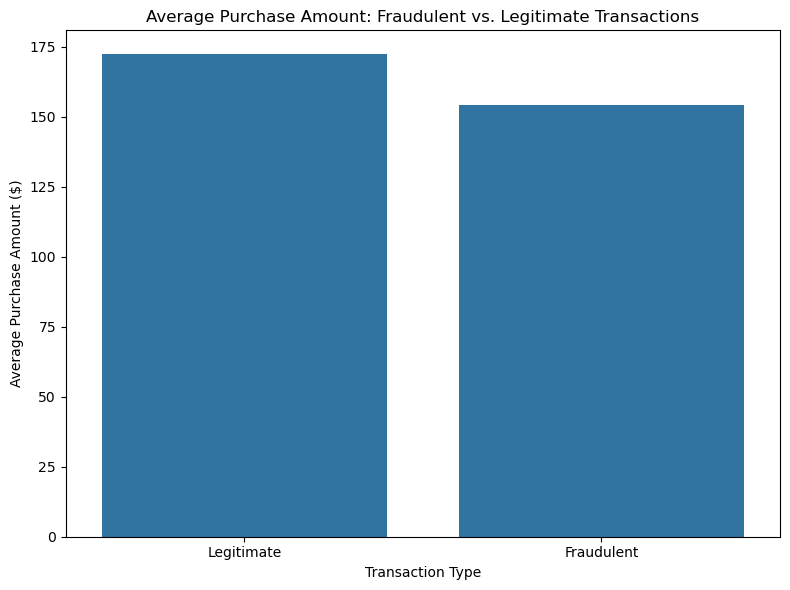

In [3]:
# Calculate the average purchase amount by transaction type (fraud vs. legitimate)
df_fraud_legit_purchase = df_temp.groupby('fraud_flag')['purchase_amount'].mean().reset_index(name='average_purchase')

# Map the values of the fraud_flag column for clearer labels on the plot
df_fraud_legit_purchase['fraud_flag'] = df_fraud_legit_purchase['fraud_flag'].map({False: 'Legitimate', True: 'Fraudulent'})

# Create the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(data=df_fraud_legit_purchase, x='fraud_flag', y='average_purchase')

# Add titles and labels for the chart
plt.title('Average Purchase Amount: Fraudulent vs. Legitimate Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Average Purchase Amount ($)')

plt.tight_layout()
plt.show()